In [1]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [2]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

import numpy as np #numerical python used for working with arrays, mathematical operations
import xarray as xr #package for labeling and adding metadata to multi-dimensional arrays
import torch
import sys
sys.path.append("C:\\Users\\jamss\\Downloads\\PyDDM-main\\PyDDM-main\\PyDDM")
import ddm_analysis_and_fitting as ddm


In [3]:
ddmmatrix = xr.open_dataset("Z:\\JJ\\2022-08-08 GPU CNN data\\Testing-CNN-Main\\ddmmatrix\\" + str(60) + "v4.nc")
ddmvar = xr.open_dataset("Z:\\JJ\\2022-08-08 GPU CNN data\\Testing-CNN-Main\\ddmmatrix\\var" + str(60)+".nc")

FileNotFoundError: [Errno 2] No such file or directory: b'Z:\\JJ\\2022-08-08 GPU CNN data\\Testing-CNN-Main\\ddmmatrix\\60v4.nc'

In [ ]:
qmin = 1
qmax = 47
dt = 1
lagtime = 50

In [75]:
new_ddm_matrix = ddm.recalculate_ISF_with_new_background(ddmmatrix.copy(), background_method=1)
background = new_ddm_matrix.B
amplitude = new_ddm_matrix.Amplitude
    
    
target = ddmvar.ddm_matrix[:lagtime,:,qmin:qmax].mean(axis=1)
target = 1 - ((target - background)/amplitude[qmin:qmax])

In [ ]:
ddmmatrix1 = xr.open_dataset("Z:\\JJ\\2022-08-08 GPU CNN data\\Testing-CNN-Main\\ddmmatrix\\" + str(60) + "v4.nc")
new_ddm_matrix1 = ddm.recalculate_ISF_with_new_background(ddmmatrix.copy(), background_method=1)
background1 = new_ddm_matrix1.B
amplitude1 = new_ddm_matrix1.Amplitude
    
    
target1 = ddmvar.ddm_matrix[:lagtime,:,qmin:qmax].mean(axis=1)
target1 = 1 - ((target1 - background1)/amplitude1[qmin:qmax])

Text(0.5, 1.0, '2 by 2 binning 100 #lag 600 last lag ')

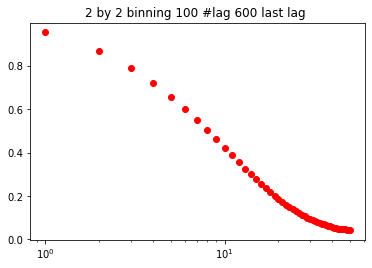

In [79]:
plt.semilogx(ddmvar.lagtime[0:50], target.sel(q=4, method='nearest'), 'ro', label = "0.5q")
#plt.semilogx(ddmvar.lagtime[0:50], target1.sel(q=2, method='nearest'), 'bo', label = "0.5q")
plt.title("2 by 2 binning 100 #lag 600 last lag ")

In [4]:
def cut_into_training_qtMatrix_isf(ddm_matrix_variable,ddm_matrix_dataset,dt,lagtime,file_name,
                                   qmin=1, qmax=47):
    totalframe = ddm_matrix_variable.shape[1]
    
    target_data = file_name +'_target_' + str((totalframe-lagtime)//dt)
    dict_training = dict()
    
    new_ddm_matrix = ddm.recalculate_ISF_with_new_background(ddm_matrix_dataset.copy(), background_method=1)
    background = new_ddm_matrix.B
    amplitude = new_ddm_matrix.Amplitude
    
    
    target = ddm_matrix_variable[:lagtime,:,qmin:qmax].mean(axis=1)
    target = 1 - ((target - background)/amplitude[qmin:qmax])
    
    
    save_data_target = np.zeros((1,target.shape[0],target.shape[1]))
    save_data_target[0] = target
    torch.save(save_data_target, 'data/smallframe/'+target_data)
    
    for i in range(0,totalframe-lagtime,dt):
        #get the noisy data:
        #print(i)
        index = i//dt
        raw_data = file_name+'_'+str(index)+'of'+str((totalframe-lagtime)//dt)

        noisy_data = ddm_matrix_variable[:lagtime,i:i+dt,qmin:qmax].mean(axis=1)
        noisy_data = 1 - ((noisy_data - background)/amplitude[qmin:qmax]) #calculate the ISF
        
        save_data = np.zeros((1, noisy_data.shape[0], noisy_data.shape[1]))
        save_data[0] = noisy_data
        
        torch.save(save_data,'data/smallframe/'+raw_data)
        dict_training[raw_data] = {'data':'data/smallframe/'+raw_data, 'target':'data/smallframe/'+target_data}
        #save the noisy data as pytorch array or whatever we need...
    torch.save(dict_training, 'data/dataset/'+file_name+'_'+str((totalframe-lagtime)//dt))
    return noisy_data,target

In [16]:

for i in range(1,2): 
    ddmmatrix = xr.open_dataset("C:\\Users\\jamss\\Downloads\\StevenData\\1umBead_DexDilution_2.5%_T1_1\\dexdilution" + str(i) + ".nc")
    ddmvar = xr.open_dataset("C:\\Users\\jamss\\Downloads\\StevenData\\1umBead_DexDilution_2.5%_T1_1\\dexdilutionvar" + str(i)+".nc")
    noisy, targ = cut_into_training_qtMatrix_isf(ddmvar.ddm_matrix, ddmmatrix, 1, 50, "dexdilution"+str(i), qmin=1, qmax=47)
    print(i)

1


In [14]:
targ

<xarray.DataArray (lagtime: 50, q: 46)>
array([[1.00019516, 1.00038047, 1.00056861, ..., 1.02714807, 1.03117223,
        1.03597614],
       [1.00011973, 1.0001702 , 1.0001836 , ..., 1.01861336, 1.02244846,
        1.02689474],
       [1.00004771, 0.99997648, 0.9998162 , ..., 1.0105662 , 1.01417982,
        1.01831958],
       ...,
       [0.99852513, 0.99555485, 0.990984  , ..., 0.8721653 , 0.87858688,
        0.8821095 ],
       [0.99850382, 0.99548979, 0.99084054, ..., 0.87134119, 0.8778431 ,
        0.88144413],
       [0.99848252, 0.99542355, 0.99069974, ..., 0.87053748, 0.87715602,
        0.88079845]])
Coordinates:
  * lagtime  (lagtime) int32 1 2 3 4 5 6 7 8 9 10 ... 42 43 44 45 46 47 48 49 50
  * q        (q) float64 0.1312 0.2625 0.3937 0.525 ... 5.644 5.775 5.906 6.037

In [9]:
training_dataset_path  = 'C:\\Users\\svc-scst291lab\\Downloads\\2022-08-08 Training CNN with ISF\\Testing-CNN-main\\data\\dataset\\'
training_dataset = os.listdir('C:\\Users\\svc-scst291lab\\Downloads\\2022-08-08 Training CNN with ISF\\Testing-CNN-main\\data\\dataset')
training_dataset = [k for k in training_dataset if 'bead_dilution' in k]
print(len(training_dataset))
print(training_dataset)

100
['bead_dilution100_2949', 'bead_dilution10_2949', 'bead_dilution11_2949', 'bead_dilution12_2949', 'bead_dilution13_2949', 'bead_dilution14_2949', 'bead_dilution15_2949', 'bead_dilution16_2949', 'bead_dilution17_2949', 'bead_dilution18_2949', 'bead_dilution19_2949', 'bead_dilution1_2949', 'bead_dilution20_2949', 'bead_dilution21_2949', 'bead_dilution22_2949', 'bead_dilution23_2949', 'bead_dilution24_2949', 'bead_dilution25_2949', 'bead_dilution26_2949', 'bead_dilution27_2949', 'bead_dilution28_2949', 'bead_dilution29_2949', 'bead_dilution2_2949', 'bead_dilution30_2949', 'bead_dilution31_2949', 'bead_dilution32_2949', 'bead_dilution33_2949', 'bead_dilution34_2949', 'bead_dilution35_2949', 'bead_dilution36_2949', 'bead_dilution37_2949', 'bead_dilution38_2949', 'bead_dilution39_2949', 'bead_dilution3_2949', 'bead_dilution40_2949', 'bead_dilution41_2949', 'bead_dilution42_2949', 'bead_dilution43_2949', 'bead_dilution44_2949', 'bead_dilution45_2949', 'bead_dilution46_2949', 'bead_dilutio

In [10]:
import TCF_Training_Prep
validation_dict = dict()
training_dict = dict()
initial_state = False
for i in range(100):
    if not (i == 0 or i == 1 or i ==10 or i == 11 or i ==20 or i ==21 or i ==30 or i ==31 or i ==40 or i ==41 or i==50 or i==51 or i==60 or i==61 or i ==70 or i==71 or i ==80 or i ==81 or i ==90 or i==91):
        print(str(i) + "true")
        training_dict = TCF_Training_Prep.merge_2(training_dict,torch.load(training_dataset_path+training_dataset[i]))
    else:
        print(i)
        validation_dict = TCF_Training_Prep.merge_2(validation_dict,torch.load(training_dataset_path+training_dataset[i]))

0
1
2true
3true
4true
5true
6true
7true
8true
9true
10
11
12true
13true
14true
15true
16true
17true
18true
19true
20
21
22true
23true
24true
25true
26true
27true
28true
29true
30
31
32true
33true
34true
35true
36true
37true
38true
39true
40
41
42true
43true
44true
45true
46true
47true
48true
49true
50
51
52true
53true
54true
55true
56true
57true
58true
59true
60
61
62true
63true
64true
65true
66true
67true
68true
69true
70
71
72true
73true
74true
75true
76true
77true
78true
79true
80
81
82true
83true
84true
85true
86true
87true
88true
89true
90
91
92true
93true
94true
95true
96true
97true
98true
99true


In [11]:
torch.save(training_dict,'./data/dict_training_08_08_22')
torch.save(validation_dict, './data/dict_validation_08_08_22')

In [17]:
noisy, targ = cut_into_training_qtMatrix_isf(ddmvar.ddm_matrix, ddmmatrix, 1, 50, "test", qmin=1, qmax=47)

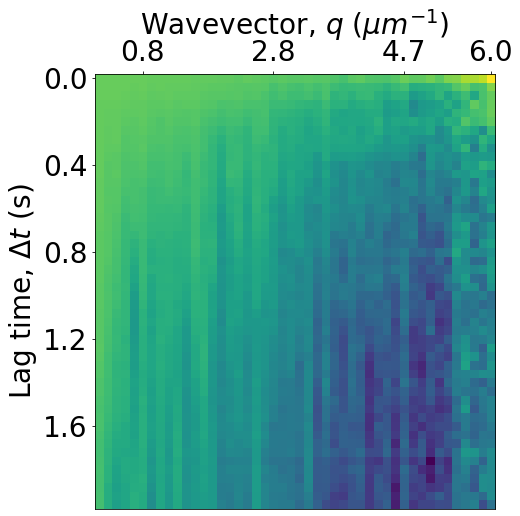

In [12]:
###############################
## PLOTTING THE Q-DT MATRIX  ##
###############################

fig,ax = plt.subplots(figsize=(8,8))
plt.matshow(noisy, fignum=0)

q_indices = [5,20,35,45]
ax.set_xticks(q_indices)
q_labels = []
for qindex in q_indices:
    q_labels.append("%.1f" % noisy.q[qindex])
ax.set_xticklabels(q_labels)

lagtimes_frames = np.array([0,10,20,30,40])
ax.set_yticks(lagtimes_frames)
time_labels = lagtimes_frames/25.0
ax.set_yticklabels(time_labels)

ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')
ax.set_xlabel("Wavevector, $q$ ($\mu m^{-1}$)", fontsize=28)
ax.set_ylabel("Lag time, $\Delta t$ (s)", fontsize=28)
ax.tick_params(direction='out', which='both', labelsize=28)

plt.savefig("ddmmatrix_qdt_matrix.png", bbox_inches ='tight')

fig,ax = plt.subplots(figsize=(8,8))
plt.matshow(, fignum=0)

q_indices = [5,20,35,45]
ax.set_xticks(q_indices)
q_labels = []
for qindex in q_indices:
    q_labels.append("%.1f" % noisy.q[qindex])
ax.set_xticklabels(q_labels)

lagtimes_frames = np.array([0,10,20,30,40])
ax.set_yticks(lagtimes_frames)
time_labels = lagtimes_frames/25.0
ax.set_yticklabels(time_labels)

ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')
ax.set_xlabel("Wavevector, $q$ ($\mu m^{-1}$)", fontsize=28)
ax.set_ylabel("Lag time, $\Delta t$ (s)", fontsize=28)
ax.tick_params(direction='out', which='both', labelsize=28)

plt.savefig("ddmmatrix_qdt_matrix.png", bbox_inches ='tight')

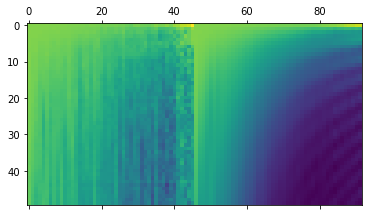

In [7]:
plt.figure()
plt.matshow(np.hstack((noisy, targ)), fignum=0)

In [4]:
for i in range(1,11): 
    ddmmatrix = xr.open_dataset("C:\\Users\\svc-scst291lab\\Downloads\\2022-07-28 Testing CNN for bead dilution\\Testing-CNN-main\\ddmmatrix\\" + str(i) + ".nc")
    ddmvar = xr.open_dataset("C:\\Users\\svc-scst291lab\\Downloads\\2022-07-28 Testing CNN for bead dilution\\Testing-CNN-main\\ddmmatrix\\var" + str(i)+".nc")
    new_ddm_dataset = ddm.recalculate_ISF_with_new_background(ddmmatrix.copy(), background_method=1)
    background = new_ddm_dataset.B
    amplitude = new_ddm_dataset.Amplitude
    f_target = 1 - (ddmvar.ddm_matrix[:50,:,:].mean(axis=1) - background)/amplitude
    for b in range(0,2900):
        f_data = 1 - (ddmvar.ddm_matrix[:50,0:50,:].mean(axis=1) - background)/amplitude        
        

In [ ]:
list of ddmmatrix and of ddmvar

In [6]:
for z in range(0,1):
    print(z)

0


In [3]:
#ddmmatrix = xr.open_dataset("C:\\Users\\svc-scst291lab\\Downloads\\2022-07-28 Testing CNN for bead dilution\\Testing-CNN-main\\ddmmatrix\\1.nc")
#ddmvar = xr.open_dataset("C:\\Users\\svc-scst291lab\\Downloads\\2022-07-28 Testing CNN for bead dilution\\Testing-CNN-main\\ddmmatrix\\ddm_variability_matrix1umBead_1g_2w_20pb_T3_1_MMStack_Pos0.ome.nc")

In [47]:
ddmmatrix

<xarray.Dataset>
Dimensions:           (lagtime: 30, q_y: 256, q_x: 256, q: 128, y: 256, x: 256,
                       frames: 30)
Coordinates:
  * lagtime           (lagtime) float64 0.04 0.08 0.12 0.16 ... 26.28 32.44 40.0
    framelag          (frames) int32 1 2 3 4 5 6 8 ... 351 432 533 657 811 1000
  * q_y               (q_y) float64 -16.8 -16.67 -16.54 ... 16.41 16.54 16.67
  * q_x               (q_x) float64 -16.8 -16.67 -16.54 ... 16.41 16.54 16.67
  * q                 (q) float64 0.0 0.1312 0.2625 0.3937 ... 16.41 16.54 16.67
  * y                 (y) int32 0 1 2 3 4 5 6 7 ... 249 250 251 252 253 254 255
  * x                 (x) int32 0 1 2 3 4 5 6 7 ... 249 250 251 252 253 254 255
Dimensions without coordinates: frames
Data variables:
    ddm_matrix_full   (lagtime, q_y, q_x) float64 ...
    ddm_matrix        (lagtime, q) float64 0.0 8.113e+03 ... 925.8 914.5
    first_image       (y, x) float64 2.005e+03 2.002e+03 ... 2.279e+03 2.255e+03
    alignment_factor  (lagtime, q) float64 nan 6.123e-17 ... 0.02302 -0.006723
    avg_image_ft      (q) float64 0.0 2.527e+06 1.629e+06 ... 480.0 479.5 479.6
    num_pairs_per_dt  (lagtime) int32 2999 2998 2997 1498 1498 ... 18 14 11 9 6
    B                 float64 964.2
    B_std             float64 4.668
    Amplitude         (q) float64 -964.2 5.053e+06 3.256e+06 ... -5.149 -4.997
    ISF               (lagtime, q) float64 0.0 0.9986 0.9973 ... -6.471 -8.955
Attributes: (12/22)
    units:                   Intensity
    lagtime:                 sec
    q:                       μm$^{-1}$
    x:                       pixels
    y:                       pixels
    info:                    ddm_matrix is the averages of FFT difference ima...
    ...                      ...
    number_lag_times:        30
    last_lag_time:           1000
    crop_to_roi:             [  0 256   0 256]
    binning:                 False
    bin_size:                2
    use_windowing_function:  False

In [39]:
ddmvar

<xarray.Dataset>
Dimensions:           (lagtime: 100, time: 2999, q: 64)
Coordinates:
  * time              (time) float64 0.0 0.04 0.08 0.12 ... 119.8 119.9 119.9
  * lagtime           (lagtime) int32 1 2 3 4 5 6 7 8 ... 94 95 96 97 98 99 100
  * q                 (q) float64 0.0 0.1312 0.2625 0.3937 ... 8.006 8.137 8.269
Data variables:
    ddm_matrix        (lagtime, time, q) float64 ...
    alignment_factor  (lagtime, time, q) float64 ...
Attributes:
    AlignmentFactorAxis:  0

In [14]:
new_ddm_dataset = ddm.recalculate_ISF_with_new_background(ddmmatrix.copy(), background_method=1)

In [15]:
background = new_ddm_dataset.B
amplitude = new_ddm_dataset.Amplitude

In [16]:
f_target = 1 - (ddmvar.ddm_matrix[:50,:,:].mean(axis=1) - background)/amplitude

In [17]:
f_data = 1 - (ddmvar.ddm_matrix[:50,0:50,:].mean(axis=1) - background)/amplitude

In [18]:
f_data

<xarray.DataArray (lagtime: 50, q: 64)>
array([[0.        , 0.99939435, 0.99959777, ..., 1.08131222, 1.09246335,
        1.10100106],
       [0.        , 0.99855491, 0.99892337, ..., 1.04312164, 1.05032833,
        1.05730371],
       [0.        , 0.99791248, 0.99839849, ..., 1.01679496, 1.02318799,
        1.02716985],
       ...,
       [0.        , 0.99041173, 0.98950094, ..., 0.94461067, 0.9514593 ,
        0.95654465],
       [0.        , 0.99055711, 0.98929128, ..., 0.94454154, 0.95160316,
        0.95500337],
       [0.        , 0.99069159, 0.98911371, ..., 0.94367043, 0.94987054,
        0.95468771]])
Coordinates:
  * q        (q) float64 0.0 0.1312 0.2625 0.3937 ... 7.875 8.006 8.137 8.269
  * lagtime  (lagtime) int32 1 2 3 4 5 6 7 8 9 10 ... 42 43 44 45 46 47 48 49 50

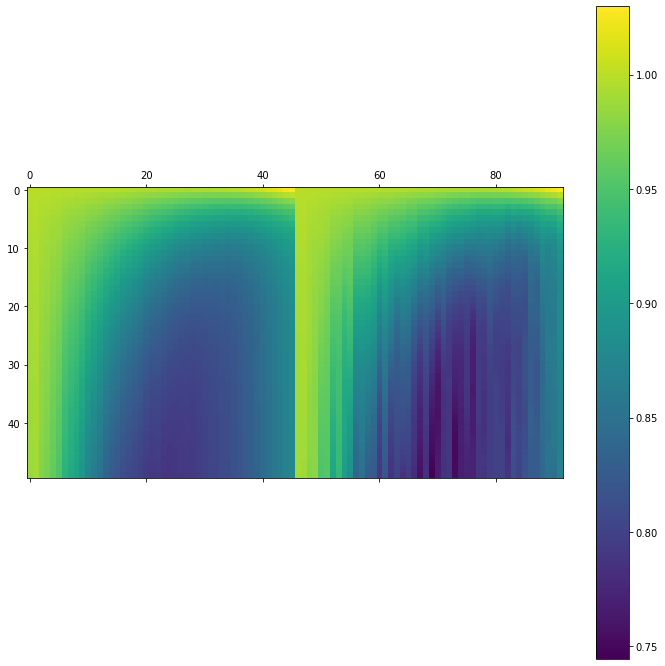

In [19]:
plt.figure(figsize=(12,12))
plt.matshow(np.hstack((f_target[:,1:47],f_data[:,1:47])), fignum=0)
plt.colorbar()

In [20]:
f_test

NameError: name 'f_test' is not defined

In [21]:
ddmvar

<xarray.Dataset>
Dimensions:           (lagtime: 100, time: 2999, q: 64)
Coordinates:
  * time              (time) float64 0.0 0.04 0.08 0.12 ... 119.8 119.9 119.9
  * lagtime           (lagtime) int32 1 2 3 4 5 6 7 8 ... 94 95 96 97 98 99 100
  * q                 (q) float64 0.0 0.1312 0.2625 0.3937 ... 8.006 8.137 8.269
Data variables:
    ddm_matrix        (lagtime, time, q) float64 ...
    alignment_factor  (lagtime, time, q) float64 ...
Attributes:
    AlignmentFactorAxis:  0

ValueError: x and y must have same first dimension, but have shapes (30,) and (50,)

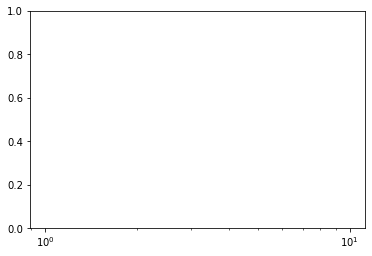

In [22]:
plt.semilogx(ddmmatrix.lagtime, f_target.sel(q=0.1, method='nearest'), 'ro', label = "0.5q")
#plt.semilogx(ddm_calc.ddm_dataset.lagtime, new_ddm_dataset.ISF.sel(q=1, method='nearest'), 'bo', label = "1q")
#plt.semilogx(ddm_calc.ddm_dataset.lagtime, new_ddm_dataset.ISF.sel(q=1.5, method='nearest'), 'go', label = "1.5q")
#plt.semilogx(ddm_calc.ddm_dataset.lagtime, new_ddm_dataset.ISF.sel(q=2, method='nearest'), 'yo', label= "2q")
#plt.semilogx(ddm_calc.ddm_dataset.lagtime, new_ddm_dataset.ISF.sel(q=2.5, method='nearest'), 'co', label = "2.5q")
#plt.semilogx(ddm_calc.ddm_dataset.lagtime, new_ddm_dataset.ISF.sel(q=6.0, method='nearest'), 'mo', label = "5q")
#plt.title("Background method = 1")

Background method = 1:  <xarray.DataArray 'B' ()>
array(865.51856094)
<xarray.DataArray 'q' ()>
array(6.03748588)
Coordinates:
    q        float64 6.037


Text(0.5, 1.0, 'ddm matrix')

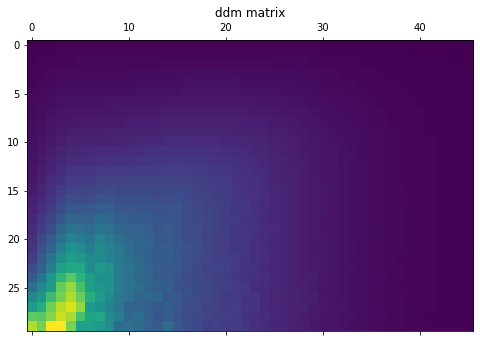

In [43]:
print("Background method = 1: ", new_ddm_dataset.B)
print(new_ddm_dataset.q[46])

plt.figure(figsize=(8,12))
plt.matshow(new_ddm_dataset.ddm_matrix[:50,1:47], fignum=0)
plt.title("ddm matrix")